# 4.10. Coding Etiquette & Excel Reporting - Task Part 1.1.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import Data
path = r'C:\Users\eminc\OneDrive\A  - Career Foundry\Data Immersion\A4 Python Fundamentals for Data Analysts\01-2023 Instacart Basket Analysis'

In [4]:
df1_sample = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_data_merged.pkl'))

In [5]:
df1_sample.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,fam_status,income,region,exclusion flag,age_flag,income_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages


In [6]:
df1_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 object 
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           object 
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest day             object 
 15  busiest days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  avg_spending            float64
 20  spending_flag           object 
 21  order_frequency         float6

In [7]:
df1_sample.shape

(10000000, 34)

In [30]:

df1_sample['order_id']=df1_sample['order_id'].astype('int32')
df1_sample['order_number']=df1_sample['order_number'].astype('int8')
df1_sample['orders_day_of_week']=df1_sample['orders_day_of_week'].astype('int8')
df1_sample['order_hour_of_day']=df1_sample['order_hour_of_day'].astype('int8')
df1_sample['days_since_prior_order']=df1_sample['days_since_prior_order'].astype('float16')

In [31]:
df1_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 object 
 2   order_number            int8   
 3   orders_day_of_week      int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float16
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           object 
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest day             object 
 15  busiest days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  avg_spending            float64
 20  spending_flag           object 
 21  order_frequency         float6

In [8]:
# T7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [9]:
df1_sample.groupby('age_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                              mean  min   max
age_flag                                     
Adults 35-65              9.044311  0.0  30.0
Seniors 65+               8.857471  0.0  30.0
Young Adults 18-34        8.952718  0.0  30.0

In [10]:
df1_sample.groupby('age_flag').agg({'avg_spending': ['mean', 'min', 'max']})

avg_spending                       
                           mean       min          max
age_flag                                              
Adults 35-65          10.690257  1.000000  8703.400000
Seniors 65+           10.430548  1.000000  3902.835065
Young Adults 18-34    10.782399  2.133333  8794.882427

In [11]:
df1_sample.groupby('income_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                         mean  min   max
income_flag                             
Low Income           9.544526  0.0  30.0
Middle Income        8.885613  0.0  30.0
Upper Income         8.909382  0.0  30.0

In [12]:
df1_sample.groupby('income_flag').agg({'avg_spending': ['mean', 'min', 'max']})

avg_spending                       
                      mean       min          max
income_flag                                      
Low Income        6.729958  1.000000    11.700000
Middle Income     9.209842  1.200000  8794.882427
Upper Income     28.741557  7.001845  3902.835065

In [13]:
df1_sample.groupby('department').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                           mean  min   max
department                                
alcohol                8.480026  0.0  30.0
babies                 8.013986  0.0  30.0
bakery                 8.796857  0.0  30.0
beverages              9.051893  0.0  30.0
breakfast              9.036175  0.0  30.0
bulk                   8.325869  0.0  30.0
canned goods           9.383915  0.0  30.0
dairy eggs             8.758091  0.0  30.0
deli                   9.177638  0.0  30.0
dry goods pasta        9.267640  0.0  30.0
frozen                 9.468003  0.0  30.0
household              9.578282  0.0  30.0
international          8.971535  0.0  30.0
meat seafood           9.217484  0.0  30.0
missing                8.395349  0.0  30.0
other                  8.923584  0.0  30.0
pantry                 9.016658  0.0  30.0
personal care          9.199837  0.0  30.0
pets                   9.109329  0.0  30.0
produce                8.864831  0.0  30.0
snacks                 9.012776  0.0  30.0

In [14]:
df1_sample.groupby('department').agg({'avg_spending': ['mean', 'min', 'max']})

avg_spending                       
                        mean       min          max
department                                         
alcohol            21.146782  3.380000  8703.400000
babies             10.246937  4.585185  2230.077778
bakery             11.412341  3.350000  8794.882427
beverages          11.566481  1.700000  8794.882427
breakfast          12.175357  2.222222  8794.882427
bulk                8.865017  3.564286  2496.148259
canned goods       10.892366  1.200000  8794.882427
dairy eggs         10.915283  1.700000  8794.882427
deli               10.397289  2.290000  5135.893590
dry goods pasta    11.074982  3.447222  8794.882427
frozen             11.177457  2.257143  8794.882427
household          12.854978  1.000000  8794.882427
international      10.389415  3.447222  3427.154701
meat seafood       11.230146  3.609091  8794.882427
missing            10.485680  4.015517  1411.734035
other              11.590694  3.635484  1425.936879
pantry             10.888026  3.176923  8794.882427
personal care      12.840181  2.222222  8794.882427
pets               16.072412  5.004545  3902.835065
produce             9.558578  1.933333  8794.882427
snacks             10.471475  2.133333  8794.882427

In [15]:
# T8: Compare your customer profiles with regions and departments. 
#     Can you identify a link between them? Customers may demonstrate different behaviors across regions, 
#     which could make this information important.

In [16]:
crosstab_age = pd.crosstab(df1_sample['age_flag'], df1_sample['region'], dropna = False)

In [17]:
crosstab_age

region,Midwest,Northeast,South,West
age_flag,,,,
Adults 35-65,1099457,807732,1540364,1205715
Seniors 65+,597889,483124,902707,688829
Young Adults 18-34,634695,480759,888633,670096


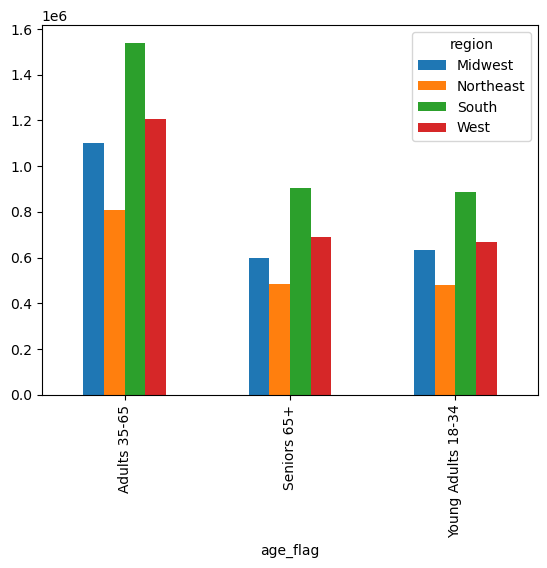

In [26]:
bar_crstb_age = crosstab_age.plot.bar()

In [27]:
bar_crstb_age.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_crstb_age.png'))

In [18]:
crosstab_income = pd.crosstab(df1_sample['income_flag'], df1_sample['region'], dropna = False)

In [19]:
crosstab_income

region,Midwest,Northeast,South,West
income_flag,,,,
Low Income,284746,216474,432941,312542
Middle Income,1838415,1402162,2602346,2017050
Upper Income,208880,152979,296417,235048


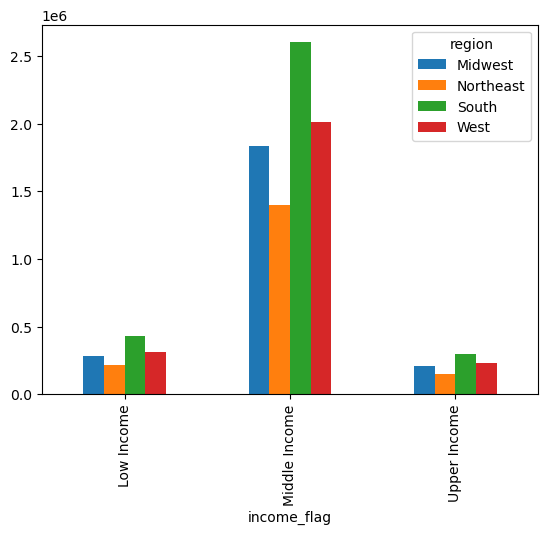

In [28]:
bar_crstb_income = crosstab_income.plot.bar()

In [29]:
bar_crstb_income.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_crstb_income.png'))

In [20]:
crosstab_department = pd.crosstab(df1_sample['department'], df1_sample['region'], dropna = False)

In [21]:
crosstab_department

region,Midwest,Northeast,South,West
department,,,,
alcohol,6762,4972,11210,8722
babies,34708,26545,49952,37157
bakery,84354,64788,120293,93171
beverages,195292,152158,282489,211726
breakfast,49022,37672,71222,55518
bulk,3150,2218,4448,3536
canned goods,69766,52602,97885,76815
dairy eggs,388982,292128,555066,427645
deli,73340,57408,104735,81225


<AxesSubplot:xlabel='department'>

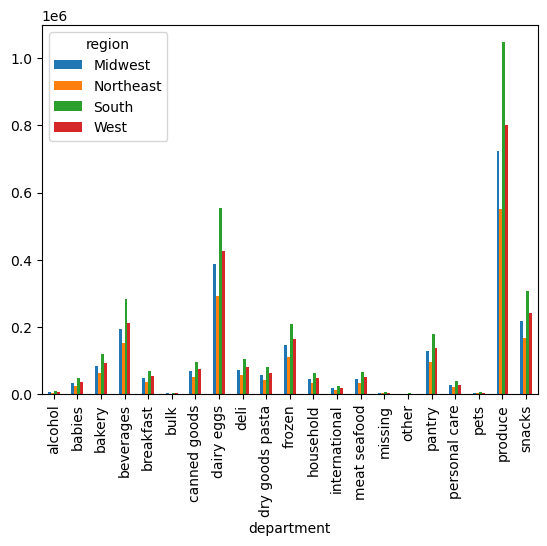

In [22]:
crosstab_department.plot.bar()